## In this Notebook, we intrinscically evaluate the trained word embeddings and compare the results for the same.

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/Jash")

Drive already mounted at /Jash; to attempt to forcibly remount, call drive.mount("/Jash", force_remount=True).


In [ ]:
# Now taking the inputs from the users for generating the embeddings
print("We have only made the model for window size = 2 i.e 5 words are considered in total \n")
choice = input("Enter : SKG/CBOW/NSSKG")
emb = int(input("Vector size"))
alpha = float(input("Learning Rate"))

We have only made the model for window size = 2 i.e 5 words are considered in total 

Enter : SKG/CBOW/NSSKGSKG
Vector size200
Learning Rate0.001


In [ ]:
path = "/Jash/My Drive/EMB/" + str(choice) + "_" + str(emb) + "_" + str(alpha) + "_embeddings.p"
infile = open(path,'rb')
embeddings = pickle.load(infile)
infile.close()

In [ ]:
print(type(embeddings))    # should return a dictonary

# Reading the embedding for each word
for num,word in enumerate(embeddings):
  if num < 5 :
    print(len(embeddings[word]))
    print(word)
    print(embeddings[word])
    input()               # For interruption after every loop
  else:
    pass                   

<class 'dict'>
200
ASIAN
[5.43225425e-01 2.77947406e-01 4.24541459e-01 8.44871020e-01
 4.85941127e-03 1.21785369e-01 6.71238607e-01 8.25667853e-01
 1.36823405e-01 5.75151573e-01 8.91441801e-01 2.09003834e-01
 1.85900144e-01 1.07967303e-01 2.19918313e-01 9.78078127e-01
 8.12234942e-01 1.72357625e-01 8.16259132e-01 2.73614614e-01
 4.31270181e-01 9.40318856e-01 8.17243577e-01 3.35775339e-01
 1.75449756e-01 3.73227037e-01 5.53355882e-03 2.51888937e-01
 7.95182729e-01 1.52233736e-02 5.99459318e-01 6.04172913e-01
 1.05469723e-01 3.82586699e-01 3.62349484e-02 8.90157328e-01
 9.80585574e-01 5.91339173e-02 8.91364998e-01 5.76959927e-01
 7.42863645e-01 6.29714226e-01 5.82424692e-01 2.08327766e-02
 2.10347774e-01 5.45144202e-01 7.68681624e-01 2.51136249e-01
 2.85861099e-01 8.51861525e-01 9.74523265e-01 8.84879410e-01
 3.58751359e-01 5.98882415e-01 3.54196217e-01 3.40682504e-01
 1.78124795e-01 2.37940856e-01 4.51941259e-02 5.04932071e-01
 3.76357357e-01 5.92329443e-01 6.29581370e-01 1.42440953e-01

Now we develop a thesurus of words from NLTK and will measure the accuracy of Word Vectors we developed. This is called Intrinsic Evaluation


In [ ]:
from sklearn.decomposition import PCA
X = []

for word in embeddings:
  X.append(embeddings[word])

X = np.array(X)

In [ ]:
import plotly.express as px

pca_trial = PCA(n_components=7)
pca_trial.fit(X)

pca = PCA(n_components=2)
pca.fit(X)

exp_var_cumul = np.cumsum(pca_trial.explained_variance_ratio_)

fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)
fig.show()

In [ ]:
X = pca.transform(X)

print(pca.explained_variance_ratio_)

[0.00544295 0.00540203]


As we can see the variance is very very less

In [ ]:
for num,words in enumerate(embeddings):
  embeddings[words] = X[num]

In [ ]:
print(embeddings)

{'ASIAN': array([0.31570374, 0.32995319]), 'EXPORTERS': array([ 0.47480517, -0.29687835]), 'FEAR': array([-0.58167315, -0.23093043]), 'DAMAGE': array([-0.30646991, -0.33752553]), 'FROM': array([ 0.14614745, -0.03950378]), 'U': array([0.0391485, 0.3822516]), 'S': array([ 0.34340293, -0.09695626]), 'JAPAN': array([0.40191067, 0.32961143]), 'RIFT': array([ 0.22105612, -0.12316835]), 'Mounting': array([0.45280875, 0.52368936]), 'trade': array([ 0.15074169, -0.43985265]), 'friction': array([0.41035893, 0.03688968]), 'between': array([-0.08522838, -0.08721308]), 'the': array([0.2446345 , 0.24752711]), 'And': array([-0.242965 ,  0.0741061]), 'Japan': array([ 0.32774077, -0.26422705]), 'has': array([-0.04254657, -0.2946412 ]), 'raised': array([0.65063768, 0.3013197 ]), 'fears': array([ 0.30557947, -0.27806245]), 'among': array([-0.0941972,  0.0246581]), 'many': array([-0.05879708, -0.38532771]), 'of': array([ 0.06936175, -0.14815989]), 'Asia': array([-0.09574658, -0.36476804]), 's': array([-0.

## Now we actually find the intrinsic evaluation parameters

In [ ]:
# Developing a thesaursus for human percivation.
import nltk
from nltk.corpus import reuters
nltk.download('reuters')
reuters.categories()

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [ ]:
# We choose 5 categories randomly
import random
random.seed(6969)

cats = np.array(reuters.categories())

l = []
for i in range(int(len(reuters.categories()))):
  l.append(i)

cho = random.choices(l,k=5)  
print(cho)

for num,word in enumerate(cho):
  cho[num] = str(cats[word])
del l
print(cho)

[6, 86, 32, 5, 30]
['cocoa', 'wheat', 'income', 'castor-oil', 'hog']


In [ ]:
test = [
        ['swine', 'To', 'COTTON','GHANA','responsive'],
        ['salaries', 'SUGAR', 'American','traders'],
        ['economists','Corporation', 'market','merchandise','Rubber','slaughterhouses'],
        ['castorseed','OIL','cigarettes', 'opium','Drought', 'expenditures'],
        ['salaries', 'fund','environment', 'CROPS', 'CATTLE']
]

[-0.12715341615491713, -0.019954184270071035, -0.5437524444269494, -0.4919183014778464, 0.3678162194091421] [0.06901528904005026, 0.3792735569070044, -0.010978644628672119, -0.10230466524915119, -0.3632260559902285]


[0.45651961212838404, -0.07187561054573292, 0.2896422033752929, 0.12485783502995643] [-0.2696068447904144, 0.35149949407019276, 0.4352811957676445, 0.23068700944410786]


[-0.12648287130277072, -0.1467901207800036, 0.40998482752702275, -0.06519035350734848, -0.2748449251772232, 0.32854736072670543] [-0.08237145243244563, -0.6241284935225376, -0.025931960570468433, -0.4015947339170568, -0.0021344611196201027, -0.08123874005922667]


[-0.3718618294815223, -0.5684525181028633, -0.03438287345301637, -0.28143562618650114, -0.06890088596930083, 0.024038565618049682] [-0.22370156958466944, -0.14262226652128868, -0.7320492573809572, 0.38068655559409087, -0.203590091687841, 0.48866087452109513]


[0.45651961212838404, 0.004614818902180916, 0.04095166342947656, -0.35268930796873643

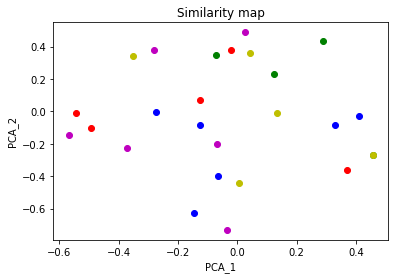

In [ ]:
import matplotlib.pyplot as plt

colourmap = np.array(['r', 'g', 'b', 'm', 'y'])

for i in range(5):
  
  X = []
  Y = []
  for word in test[i]:
    try:
      a,b = embeddings[word]
      X.append(a)
      Y.append(b)
    except:
      pass
  
  print(X,Y)
  plt.scatter(X, Y, c=colourmap[i])
  print("\n")
  del X
  del Y

plt.title('Similarity map')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')

plt.show()

In [ ]:
# Eucledian Distance and cosine similarity

word1 = "provinces"
word2 = "cities"

a = embeddings[word1]
b = embeddings[word2]

dist = np.linalg.norm(a - b)

from numpy import dot
from numpy.linalg import norm

cos_sim = dot(a, b)/(norm(a)*norm(b))

In [ ]:
acc = cos_sim*100
loss = abs(dist)

print("The accuracy is : ", acc , "\nThe Loss is : ", loss)

The accuracy is :  59.25663261473686 
The Loss is :  0.2634610028063578
